# Time Series Analysis Using ODM2

This notebook demonstrates basic time series data analysis using scientific Python libraries such as [NumPY](http://www.numpy.org/). This example uses water temperature data that is stored in a HydroShare TimeSeries resource to derive daily aggregated values and store the results in a new HydroShare resource.


## Script Setup and Preparation

Before we begin our processing, we must import several libaries into this notebook. The `ts_utils` library provides functions for interacting HydroShare Time Series Resources, including data querying and dowloading.  The `hs_utils` function provides general purpose functions for interacting with HydroShare.  The `%matplotlib inline` command tells the notebook server to place plots and figures directly into the notebook.

**Note:** You may see some matplotlib warnings if this is the first time you are running this notebook. These warnings can be ignored.

In [13]:
# import required libraries
import os
from utilities import timeseries
import numpy as np
import collections
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Next we need to establish a secure connection with HydroShare. This is done by simply instantiating the hydroshare class that is defined within `ts_utils`. In addition to connecting with HydroShare, this command also sets environment variables for several parameters that may useful to you:

1. Your username
2. The ID of the resource which launched the notebook
3. The type of resource that launched this notebook
4. The url for the notebook server.

In [14]:
# establish a secure connection to HydroShare
ts = timeseries.timeseries()

Adding the following system variables:
   HS_USR_NAME = TonyCastronova
   HS_RES_ID = 
   HS_RES_TYPE = 
   JUPYTER_HUB_IP = 152.54.3.212

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => TonyCastronova
Successfully established a connection with HydroShare


### Retrieve a time series resource using its ID

This example uses water temperature data that is stored in HydroShare at the following url: https://www.hydroshare.org/resource/89e4e1e18f3746fc936d7185baf6f76e/ . The data for our processing routines can be retrieved using the `getTimeSeriesResource` function by passing it the global identifier from the url above.  Alternatively, you can invoke the `getTimeSeriesResource` function without any arguments to retrieve data for the resource that launched your JupyterHub instance from HydroShare.

In [15]:
# Invoke the getTimeSeriesResource with the following guid to download 
# Water temperature data from the Little Bear River, UT
ts.getTimeSeriesResource('89e4e1e18f3746fc936d7185baf6f76e')

# Alternatively, invoke the getTimeSeriesResource without any arguments
# to download the content for the resource that you launched in HydroShare
#ts.getTimeSeriesResource()

This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


## Explore the Database Contents

TimeSeries resources consist of data stored in the Observations Data Model version 2. We can use the `ts_utils` and `odm2api` libraries to explore the contents of the database.  For more information on `odm2api` functions see https://github.com/ODM2/ODM2PythonAPI or issue the following command:

`help(odm2api)`

In [16]:
# display all variables inside the database
print('\n-------- Variables ---------')
print('%-10s %-10s\n%-10s %-10s' % ('Code', 'Name', '----','----'))
for x in ts.read.getVariables():
    print('%-10s %-10s' % (x.VariableCode, x.VariableNameCV))
print('----------------------------')


-------- Variables ---------
Code       Name      
----       ----      
USU36      Temperature
----------------------------


In [17]:
# Get all of the people from the database
print('\n-------- People ---------')
print('%-10s %-10s\n%-10s %-10s' % ('First', 'Last', '-----','-----'))
for x in ts.read.getPeople():
    print('%-10s %-10s' % (x.PersonFirstName, x.PersonLastName))
print('----------------------------')


-------- People ---------
First      Last      
-----      -----     
Jeff       Horsburgh 
----------------------------


In [18]:
# Get all of the SamplingFeatures from the database that are Sites
siteFeatures = ts.read.getSamplingFeatures(type='Site')
print('\n-------------------------------- Sites ---------------------------------')
print('%-20s %-20s\n%-20s %-20s' % ('Code', 'Name', '-----','-----'))
for x in siteFeatures:
        print('%-20s %-20s' % (x.SamplingFeatureCode, x.SamplingFeatureName[:50]))
print('--------------------------------------------------------------------------')


-------------------------------- Sites ---------------------------------
Code                 Name                
-----                -----               
USU-LBR-Mendon       Little Bear River at Mendon Road near Mendon, Utah
USU-LBR-Paradise     Little Bear River at McMurdy Hollow near Paradise,
USU-LBR-Wellsville   Little Bear River near Wellsville, Utah
USU-LBR-Confluence   Little Bear River below Confluence of South and Ea
USU-LBR-EFLower      East Fork Little Bear River at Paradise Canal Dive
USU-LBR-SFLower      South Fork Little Bear River below Davenport Creek
USU-LBR-SFUpper      South Fork Little Bear River above Davenport Creek
--------------------------------------------------------------------------


In [19]:
# read the results into the ts_utils library
results = ts.readResults()
print('\n-------------------------------- Results ---------------------------------')
print('%-10s %-10s %-10s %-20s %-20s' % ('ResultID','VariableID','ValueCount','VariableName','FeatureCode'))
for x in results.values():
    print('%-10d %-10s %-10d %-20s %-20s' % (x.ResultID,
                                          x.VariableID,
                                          x.ValueCount,
                                          x.VariableObj.VariableNameCV,
                                          x.FeatureActionObj.SamplingFeatureObj.SamplingFeatureCode))
print('--------------------------------------------------------------------------')


-------------------------------- Results ---------------------------------
ResultID   VariableID ValueCount VariableName         FeatureCode         
1          1          1441       Temperature          USU-LBR-Mendon      
2          1          1334       Temperature          USU-LBR-Paradise    
3          1          1441       Temperature          USU-LBR-Wellsville  
4          1          1441       Temperature          USU-LBR-Confluence  
5          1          1441       Temperature          USU-LBR-EFLower     
6          1          1441       Temperature          USU-LBR-SFLower     
7          1          1441       Temperature          USU-LBR-SFUpper     
--------------------------------------------------------------------------


## Parse the datavalues from the ODM2 database

Now that we've explored some of the data in the odm2 database, we can use the `ts_utils` library to parse the data into objects.  These object provide an easy way for us to preview, plot, and retrieve the datavalues associated the each time series result.

In [20]:
# read the timeseries values for result ids 1,2, and 3 into memory
ts.readTsValues([1,2,3])

Processing -> Temperature: Little Bear River at Mendon Road near Mendon, Utah
Processing -> Temperature: Little Bear River at McMurdy Hollow near Paradise, Utah
Processing -> Temperature: Little Bear River near Wellsville, Utah


In [21]:
# preview these data
ts.previewTs([1,2,3,4,5])

Need to prepare the data for one or more of these result ids
Processing -> Temperature: Little Bear River below Confluence of South and East Forks near Avon, Utah
Processing -> Temperature: East Fork Little Bear River at Paradise Canal Diversion near Avon, Utah


-----------------------------------------------------------------------
 ResultID: 1                                                         
 Temperature: Little Bear River at Mendon Road near Mendon, Utah     
-----------------------------------------------------------------------
ValueDateTime             DataValue                 
2008-01-29 04:00:00       -0.2216667                
2008-01-29 04:30:00       -0.21                     
2008-01-29 03:30:00       -0.2033333                
2008-01-16 22:00:00       -0.2                      
2008-01-16 21:30:00       -0.1983333                


----------------------------------------------------------------------------
 ResultID: 2                                           

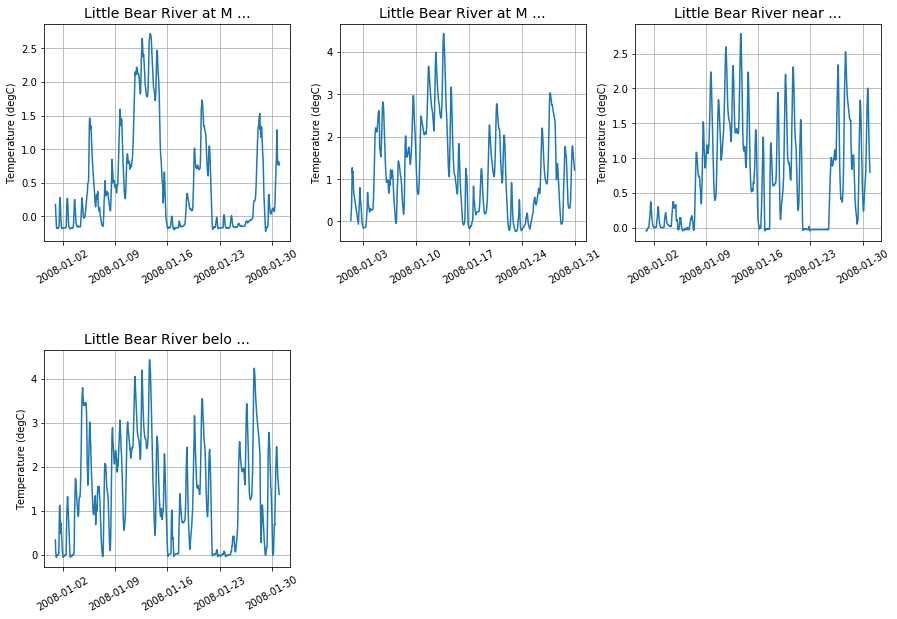

In [22]:
# preview the data as set of subplots
ts.subplotTimeSeries(ids=[1,2,3,4], cols=3)

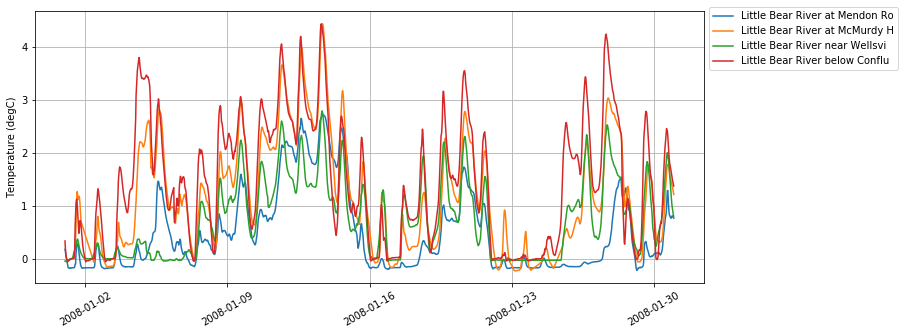

In [23]:
# plot multiple data series on a single graph
ts.plotTimeSeries(ids=[1,2,3,4])

## Data Analysis

The data previewing (above) isolate a single dataset to analyze.  In this example, we will be calculating the minimum, maximum, and average water temperature values for a `ResultID=1`: *Little Bear River at Mendon Road near Mendon, UT*. 

First, group the temperature datavalues by day.

In [24]:
# get the data that we want to analyze
data = ts.tsvalues[1]  # pandas dataframe
res = ts.tsresults[1]  # odm2result object

In [25]:
# group by date and calculate min, max, ave
df = data.groupby(data['valuedatetime'].dt.date)['datavalue'].agg({'Min':'min','Max':'max','Mean':'mean'})
df.reset_index(inplace=True)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [26]:
# preview the result
df.head()

,valuedatetime,Max,Mean,Min
0,2008-01-01,0.280000,-0.064236,-0.180000
1,2008-01-02,0.268333,-0.081250,-0.188333
2,2008-01-03,0.250000,-0.079375,-0.181667
3,2008-01-04,0.275000,-0.022917,-0.156667
4,2008-01-05,1.463333,0.760208,0.035000


Now that the water temperature data is aggregated and summarized, we can preview the results using `matplotlib`

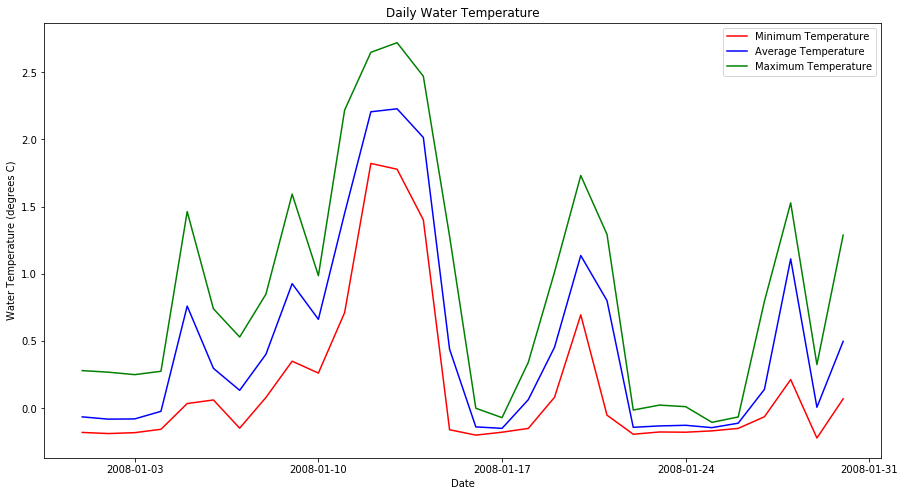

In [27]:
# plot the result
fig, ax = plt.subplots()
plt_min =df.plot(x='valuedatetime', y='Min', ax=ax, c='Red', label='Minimum Temperature', figsize=(15,8))
plt_ave =df.plot(x='valuedatetime', y='Mean', ax=ax, c='Blue', label='Average Temperature')
plt_max =df.plot(x='valuedatetime', y='Max', ax=ax, c='Green', label='Maximum Temperature')
xlabel = ax.set_xlabel('Date')
ylabel = ax.set_ylabel('Water Temperature (degrees C)')
title = ax.set_title('Daily Water Temperature')
l = plt.legend()

## Write these results to a CSV text file

At this point our data analysis is complete and we need to save our calculations somewhere.  An easy way to accomplish this is to loop over the date range and write each of the arrays to a csv file.  We are using the built-in `os.environ['DATA']` variable to get the path of the default data directory, therefore, the resulting file will be located in the `data` directory on the server.

In [28]:
# set the save path for the aggregated values
temp_agg = os.path.join(os.environ['DATA'], 'agg.csv')

# write the derived temperatures to a csv file
data.to_csv(temp_agg)

Preview the data that was saved

In [29]:
!head $temp_agg

,valueid,resultid,datavalue,valuedatetime,valuedatetimeutcoffset,censorcodecv,qualitycodecv,timeaggregationinterval,timeaggregationintervalunitsid
718,1,1,0.1766667,2008-01-01 00:00:00,-7,nc,Unknown,30.0,102
692,2,1,0.145,2008-01-01 00:30:00,-7,nc,Unknown,30.0,102
600,3,1,0.05666667,2008-01-01 01:00:00,-7,nc,Unknown,30.0,102
577,4,1,0.01666667,2008-01-01 01:30:00,-7,nc,Unknown,30.0,102
548,5,1,-0.01166667,2008-01-01 02:00:00,-7,nc,Unknown,30.0,102
483,6,1,-0.065,2008-01-01 02:30:00,-7,nc,Unknown,30.0,102
427,7,1,-0.1033333,2008-01-01 03:00:00,-7,nc,Unknown,30.0,102
250,8,1,-0.1583333,2008-01-01 03:30:00,-7,nc,Unknown,30.0,102
64,9,1,-0.1733333,2008-01-01 04:00:00,-7,nc,Unknown,30.0,102


---
## 3. Save the results back into HydroShare

Using the `hs_utils` library, the results of our timeseries analysis can be saved back into HydroShare.  First, define all of the required metadata for resource creation, i.e. *title*, *abstract*, *keywords*, and *content files*.  In addition, we must define the type of resource that will be created, in this case *genericresource*.  

***Optional*** : define the resource from which this "new" content has been derived.  This is one method for tracking resource provenance.

In [30]:
# define HydroShare required metadata
title = 'Daily Aggregate Temperature for Little Bear River near Mendon, UT'
abstract = 'This daily average air temperature for the Little Bear River gauging station near Mendon, UT.'
keywords = ['Water Temperature', 'Time Series']

# set the resource type that will be created.
rtype = 'genericresource'

# create a list of files that will be added to the HydroShare resource.
files = [temp_agg, # the aggregated data file
         ts.odm2db, # the original odm2db
         os.path.join(os.getcwd(), 'timeseries_odm2.ipynb')  # this notebook
        ]

In [ ]:
# save the state of the current notebook
from IPython.display import display,Javascript 
display(Javascript('IPython.notebook.save_checkpoint();'))

# create a hydroshare resource containing these data
resource_id = ts.hydroshare.createHydroShareResource( abstract, 
                                                      title, 
                                                      derivedFromId=None,
                                                      keywords=keywords, 
                                                      resource_type=rtype, 
                                                      content_files=files, 
                                                      public=False)